In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

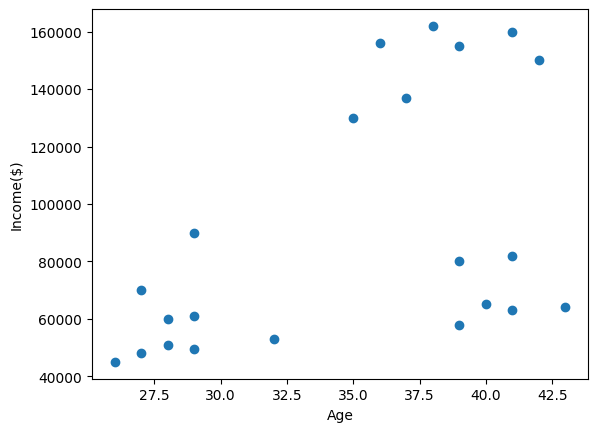

In [3]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [7]:
#to find the centroid of the clusters
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7296\2050777334.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


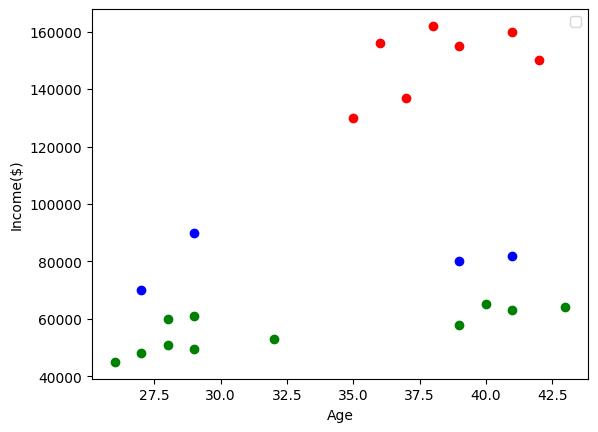

In [9]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

After Standard Scaling

In [10]:
scaler = StandardScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [11]:
df.head()

,Name,Age,Income($),cluster
0,Rob,-1.356055,-0.480684,2
1,Michael,-1.009157,-0.010159,2
2,Mohan,-1.009157,-0.692421,0
3,Ismail,-1.182606,-0.715947,0
4,Kory,1.245679,1.401417,1


In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [13]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,-1.356055,-0.480684,0
1,Michael,-1.009157,-0.010159,0
2,Mohan,-1.009157,-0.692421,0
3,Ismail,-1.182606,-0.715947,0
4,Kory,1.245679,1.401417,2


In [14]:
km.cluster_centers_

array([[-1.1247901 , -0.74862223],
       [ 0.98550535, -0.51205261],
       [ 0.60143983,  1.40141653]])

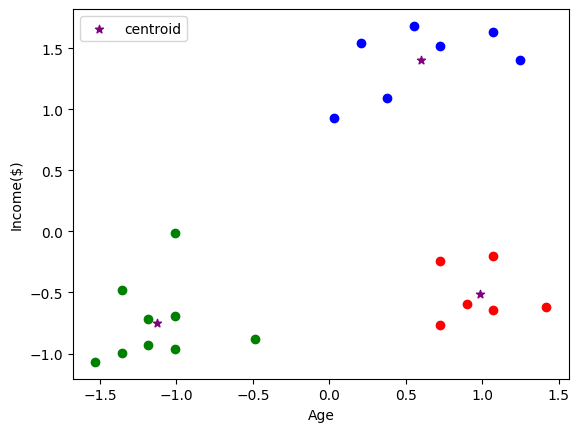

In [16]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

Elbow Method

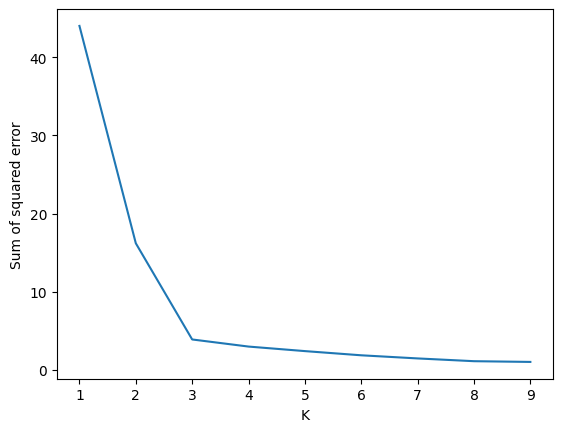

In [18]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)